In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

def load_data():
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    return (x_train, y_train), (x_test, y_test)

def build_model(filter_size=3, reg_param=0.0, optimizer='adam'):
    model = keras.Sequential([
        layers.Conv2D(32, (filter_size, filter_size), activation='relu', input_shape=(28, 28, 1),
                      kernel_regularizer=regularizers.l2(reg_param)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (filter_size, filter_size), activation='relu',
                      kernel_regularizer=regularizers.l2(reg_param)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(reg_param)),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def train_and_evaluate(filter_size, reg_param, batch_size, optimizer):
    (x_train, y_train), (x_test, y_test) = load_data()
    model = build_model(filter_size, reg_param, optimizer)
    history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test))
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'Test Accuracy: {test_acc:.4f}')
    return history

def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 57ms/step - accuracy: 0.7200 - loss: 1.4028 - val_accuracy: 0.8069 - val_loss: 0.7402
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.8146 - loss: 0.6953 - val_accuracy: 0.8182 - val_loss: 0.6875
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 55ms/step - accuracy: 0.8284 - loss: 0.6503 - val_accuracy: 0.8349 - val_loss: 0.6335
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.8354 - loss: 0.6220 - val_accuracy: 0.8334 - val_loss: 0.6225
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.8367 - loss: 0.6049 - val_accuracy: 0.8378 - val_loss: 0.5980
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.8436 - loss: 0.5869 - val_accuracy: 0.8293 - val_loss: 0.6368
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.8473 - loss: 0.5691 - val_accuracy: 0.8320 - val_loss: 0.5944
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 56ms/step - accuracy: 0.8462 - loss: 0.5735 - 

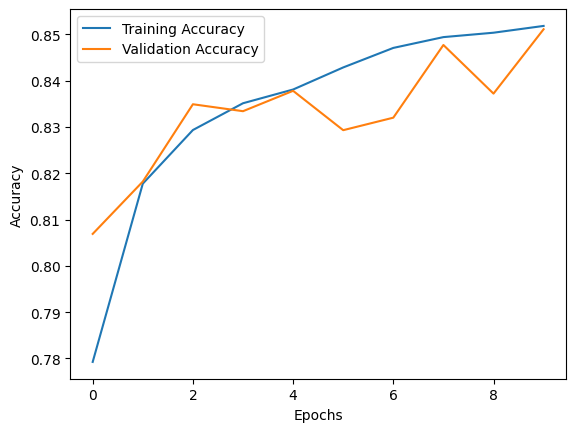

In [ ]:
if __name__ == "__main__":
    filter_size = 3  # Can be varied (e.g., 3, 5, 7)
    reg_param = 0.01  # Can be set to 0, 0.001, 0.01, etc.
    batch_size = 64  # Can be varied (e.g., 32, 64, 128)
    optimizer = 'adam'  # Try 'sgd', 'rmsprop', 'adam'

    history = train_and_evaluate(filter_size, reg_param, batch_size, optimizer)
    plot_training_history(history)